In [81]:
#Unpickling the data
import pickle

with open(r"C:\Users\MEHEK\OneDrive\Desktop\Face Detectioin\Face Detectioin\clean data\images.p","rb") as f:
  images = pickle.load(f)
with open(r"C:\Users\MEHEK\OneDrive\Desktop\Face Detectioin\Face Detectioin\clean data\labels.p","rb") as f:
  labels = pickle.load(f)

In [82]:
print(images.shape)
print(labels.shape)

(800, 100, 100)
(800,)


In [83]:
set(labels)

{np.str_('akash'),
 np.str_('hrishav'),
 np.str_('mehek'),
 np.str_('pamela'),
 np.str_('prasasti'),
 np.str_('sourab'),
 np.str_('subhadip'),
 np.str_('vishwajit')}

In [84]:
# !pip install scikit-learn

In [85]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

labels = le.fit_transform(labels)

In [86]:
set(labels)

{np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7)}

In [87]:
le.inverse_transform([0,1])

array(['akash', 'hrishav'], dtype='<U9')

In [88]:
p = len(set(labels))
print("Total number of Persons : ",p)

Total number of Persons :  8


In [89]:
# !pip install matplotlib

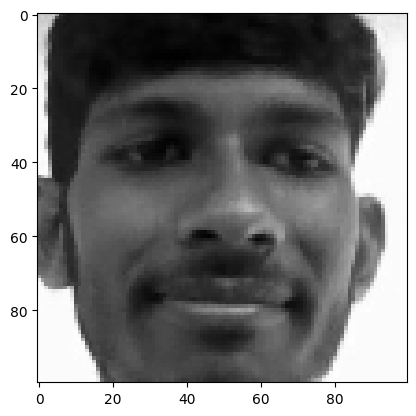

In [90]:
import matplotlib.pyplot as plt
plt.imshow(images[55],cmap='gray')
plt.show()

In [91]:
import cv2

In [92]:
def preprocessing(img):
  img = cv2.equalizeHist(img)
  img = img.reshape(100,100,1)
  img = img/255
  return img

In [93]:
import numpy as np

In [94]:
images = np.array(list(map(preprocessing,images)))
print("Shape of Input : ",images.shape)

Shape of Input :  (800, 100, 100, 1)


In [95]:
# !pip install tensorflow

In [96]:
# !pip install keras

In [97]:
import keras

In [98]:
from keras.utils import to_categorical
labels = to_categorical(labels)

In [99]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

from keras.layers import Conv2D, MaxPooling2D, Flatten

In [100]:
#Model Training
def Lenet_Model():
  model = Sequential()
  #Convolutional and ReLU Layer
  model.add(Conv2D(30,(5,5),input_shape=(100,100,1),activation='relu'))
  #MaxPooling Layer
  model.add(MaxPooling2D(pool_size=(2,2)))

  #Convolutional and ReLU Layer
  model.add(Conv2D(15,(3,3),activation='relu'))
  #MaxPooling Layer
  model.add(MaxPooling2D(pool_size=(2,2)))

  #Flatten Layer/Input Layer
  model.add(Flatten())

  #Hidden Layers
  model.add(Dense(50,activation='relu'))

  #Output Layer
  model.add(Dense(p,activation='softmax'))
  model.compile(Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [101]:
model = Lenet_Model()
model.summary()

d:\code\ENV1\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 96, 96, 30)     │           780 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 48, 48, 30)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 46, 46, 15)     │         4,065 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 23, 23, 15)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 7935)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 50)             │       396,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 8)              │           408 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 402,053 (1.53 MB)

 Trainable params: 402,053 (1.53 MB)

 Non-trainable params: 0 (0.00 B)

In [102]:
h = model.fit(images,labels,validation_split=0.1,epochs=10)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.3792 - loss: 2.1561 - val_accuracy: 0.0000e+00 - val_loss: 5.5177
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9819 - loss: 0.1366 - val_accuracy: 0.7750 - val_loss: 1.5856
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9986 - loss: 0.0075 - val_accuracy: 0.8250 - val_loss: 1.4565
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9986 - loss: 0.0061 - val_accuracy: 0.9375 - val_loss: 0.1011
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9917 - loss: 0.0156 - val_accuracy: 0.8250 - val_loss: 1.0399
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 1.0000 - loss: 6.5276e-04 - val_accuracy: 0.8375 - val_loss: 1.0532
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 1.0000 - loss: 6.7339e-05 - val_accuracy: 0.8375 - val_loss: 0.8594
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 1.0000 - loss: 3.1498e-05 - val_accu

In [103]:
model.save('final_model.h5')